Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.50      0.25      0.33         4

    accuracy                           0.93        60
   macro avg       0.72      0.62      0.65        60
weighted avg       0.92      0.93      0.92        60



<ipython-input-2-9e6bf090c7ee>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


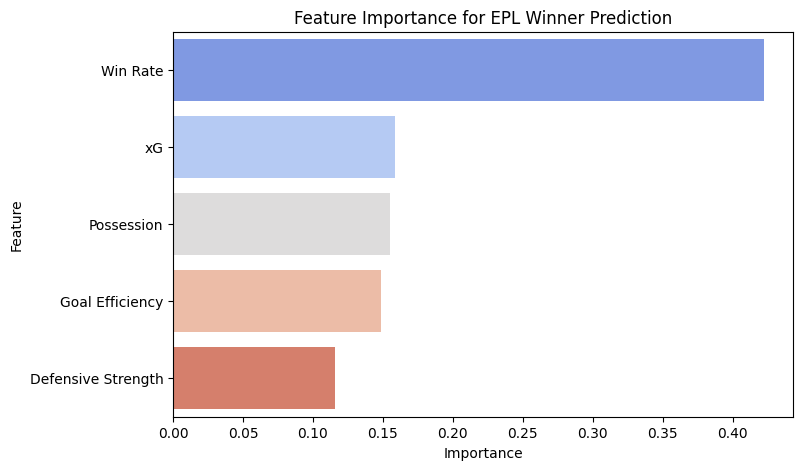

Predicted 2025 Premier League Winner: ['Wolves']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from google.colab import drive
import os

#mount google drive
drive.mount('/content/drive')

#define file path in Google Drive
data_path = '/content/drive/My Drive/epl_extended_data.csv'

#checks if the file exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}. Please check the file path and ensure the file is uploaded.")

#loads in dataset
df = pd.read_csv(data_path)

#features dataframe
df['Win Rate'] = df['Wins'] / df['Matches Played']
df['Goal Efficiency'] = df['Goals For'] / df['Matches Played']
df['Defensive Strength'] = df['Goals Against'] / df['Matches Played']

df['Champion'] = df.groupby('Season')['Points'].transform(lambda x: (x == x.max()).astype(int))

#selects features and target
features = ['Win Rate', 'Goal Efficiency', 'Defensive Strength', 'xG', 'Possession']
target = 'Champion'

X = df[features]
y = df[target]

#splits data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#trains Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

#features and shows importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

#plots feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance for EPL Winner Prediction')
plt.show()

#predicting the 2025 Winner
df_2025 = df[df['Season'] == 2024].copy()
df_2025['Season'] = 2025  # Simulating next season
X_2025 = df_2025[features]
df_2025['Predicted Champion'] = model.predict(X_2025)

predicted_winner = df_2025[df_2025['Predicted Champion'] == 1]['Team'].values
print("Predicted 2025 Premier League Winner:", predicted_winner)
